## 1. Import the data located at this link. It has information on people infected with dengue at the district level for 2015 to 2021.

In [1]:
import pandas as pd
# Ruta del archivo CSV: 
ruta_csv = "../../_data/data_dengue_peru.csv" #Ponemos el ../.. para retroceder 

# Cargar el archivo CSV en un DataFrame
dengue_df = pd.read_csv(ruta_csv, low_memory = False)
dengue_df

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2
...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN


## 2. Generate ubigeo for Departments and Provinces taking the first two and four numbers. Hint: Use this code.

In [2]:
#Ubigeo is made out of 6 characters. The first two are a code for the Department. The codes for Department range from 01 to 25, but here we see that the dataframe 
#is ommiting the 0 at the beginning, so we fix that
dengue_df['Ubigeo'] = dengue_df['Ubigeo'].astype(str).str.zfill(6)

In [3]:
dengue_df #We check if everything is alright

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2
...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN


In [4]:
#Now we can generate an Ubigeo for Department (made out by the first 2 digits) and Provincias (made out by the 4 next digits)
# Extraer los códigos 'Ubigeo' departamentales y provinciales
dengue_df['Ubigeo_Departamental'] = dengue_df['Ubigeo'].str[:2]
dengue_df['Ubigeo_Provincial'] = dengue_df['Ubigeo'].str[2:6]
dengue_df

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,Ubigeo_Departamental,Ubigeo_Provincial
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2,08,0914
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,0101
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,0101
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0,08,0914
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2,08,0914
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,0203
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,0303
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,0203
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,0303


## 3. Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile.

In [ ]:
#1. create new environment
#!conda create -n grupo4
#2. Activate new environment
#!conda activate grupo4
#3. Install package
#!conda install -c conda-forge python=3 geopandas

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [5]:
# Filter the data for the year 2021
dengue_2021 = dengue_df[dengue_df['Año'] == 2021]

# Convert the 'Casos' column to numeric
dengue_2021['Casos'] = pd.to_numeric(dengue_2021['Casos'], errors='coerce')
dengue_2021

C:\Users\SALVADOR\AppData\Local\Temp\ipykernel_6572\3149087874.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dengue_2021['Casos'] = pd.to_numeric(dengue_2021['Casos'], errors='coerce')


,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,Ubigeo_Departamental,Ubigeo_Provincial
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,0101
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,0101
6,2021,41,Dengue,LIMA,INDEPENDENCIA,LIMA,150112,NaN,15,0112
7,2021,41,Dengue,LIMA,VILLA MARIA DEL TRIUNFO,LIMA,150143,NaN,15,0143
8,2021,41,Dengue,LIMA,ATE,LIMA,150103,NaN,15,0103
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,0203
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,0303
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,0203
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,0303


In [7]:
import numpy as np

def custom_sum(series):
    # Check if all values are NaN
    if series.isna().all():
        return np.nan
    # Check if all values are zero or if there is a mix of NaN and zero
    elif (series == 0).all() or (series.fillna(0) == 0).all():
        # If there is at least one NaN in the original series, return NaN
        if series.isna().any():
            return np.nan
        else:
            return 0
    # If there is at least one positive value, replace NaN with 0 and sum all the values
    else:
        return series.fillna(0).sum()

# Apply the custom function to sum the cases by district. It sums the number of weekly cases in each district to obtain the cumulative count for the year 2021 in each district
total_cases_by_district = dengue_2021.groupby('Ubigeo')['Casos'].apply(custom_sum).reset_index()

In [8]:
total_cases_by_district

,Ubigeo,Casos
0,010101,NaN
1,010201,474.0
2,010202,25.0
3,010203,38.0
4,010204,8.0
...,...,...
464,250302,26.0
465,250303,32.0
466,250304,14.0
467,250305,2.0


In [1]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import mapping

# Ruta al shapefile de los departamentos
shapefile_path = '../../_data/INEI_LIMITE_DEPARTAMENTAL.shp'

try:
    # Cargar el shapefile de los departamentos
    departamentos = gpd.read_file(shapefile_path) 

    # Mostrar los primeros registros para verificar la carga
    print(departamentos.head())

except FileNotFoundError:
    print(f"Error: El archivo {shapefile_path} no se encuentra.")
except Exception as e:
    print(f"Ocurrió un error: {e}")

ModuleNotFoundError: No module named 'rasterio'

In [11]:
# Perform the merge based on Ubigeo
merged_gdf = distritos_gdf.merge(total_cases_by_district, left_on='UBIGEO', right_on='Ubigeo')

print(merged_gdf.columns)

Index(['CCDD', 'NOMBDEP', 'CCPP', 'NOMBPROV', 'CCDI', 'NOMBDIST', 'CAPITAL',
       'UBIGEO', 'IDPROV', 'CODIGO', 'CNT_CCPP', 'DESCRIPCIO', 'DESCARGAR',
       'WHATSAPP', 'CONTACTO', 'geometry', 'Ubigeo', 'Casos'],
      dtype='object')


In [ ]:
merged_gdf

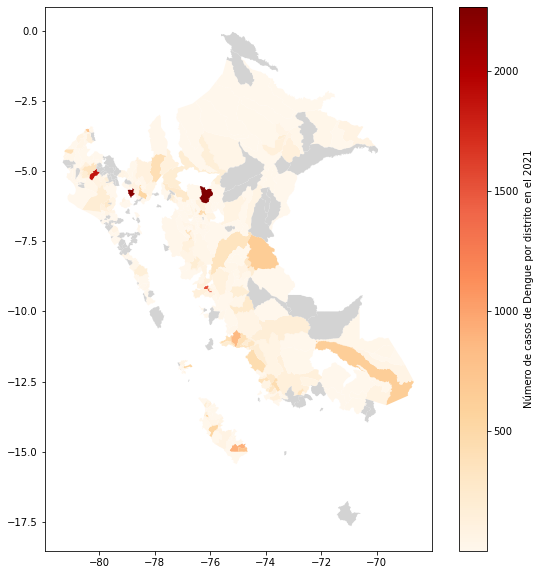

In [12]:
# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# Use the 'Cases' column that exists in merged_gdf.
plot = merged_gdf.plot(column='Casos', 
                       ax=ax, 
                       legend=False,  # Do not create a legend automatically
                       cmap='OrRd',  # Colors for data ranges
                       missing_kwds={'color': 'lightgrey'})  # Color for missing data

# Now the colorbar can be created using the color collection from 'plot', 
#which is the first element in the 'ax' collections list
cbar = fig.colorbar(plot.collections[0], ax=ax)
cbar.set_label('Número de casos de Dengue por distrito en el 2021')
plt.show()

## 4. Aggregate to province level
## Disolve to province level

In [13]:
prov_shp = distritos_gdf.dissolve( by = 'IDPROV' )
prov_shp

,geometry,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO
IDPROV,,,,,,,,,,,,,,,
0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",01,AMAZONAS,01,CHACHAPOYAS,06,CHUQUIBAMBA,CHUQUIBAMBA,010106,010106,39,CHUQUIBAMBA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
0102,"POLYGON ((-78.32620 -5.56382, -78.32625 -5.565...",01,AMAZONAS,02,BAGUA,04,EL PARCO,EL PARCO,010204,010204,9,EL PARCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
0103,"POLYGON ((-77.93780 -6.03777, -77.93781 -6.037...",01,AMAZONAS,03,BONGARA,11,VALERA,VALERA (SAN PABLO),010311,010311,16,VALERA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
0104,"POLYGON ((-77.58527 -4.47289, -77.58594 -4.475...",01,AMAZONAS,04,CONDORCANQUI,01,NIEVA,SANTA MARIA DE NIEVA,010401,010401,131,NIEVA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
0105,"POLYGON ((-77.93702 -6.69093, -77.93914 -6.693...",01,AMAZONAS,05,LUYA,17,SAN FRANCISCO DEL YESO,SAN FRANCISCO DEL YESO,010517,010517,22,SAN FRANCISCO DEL YESO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403,"POLYGON ((-80.19606 -3.61959, -80.19610 -3.620...",24,TUMBES,03,ZARUMILLA,01,ZARUMILLA,ZARUMILLA,240301,240301,3,ZARUMILLA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
2501,"POLYGON ((-73.27613 -9.68486, -73.27596 -9.685...",25,UCAYALI,01,CORONEL PORTILLO,03,IPARIA,IPARIA,250103,250103,67,IPARIA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
2502,"POLYGON ((-72.18238 -11.01266, -72.18112 -11.0...",25,UCAYALI,02,ATALAYA,02,SEPAHUA,SEPAHUA,250202,250202,48,SEPAHUA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com


## Aggregate to province level dengue data

In [15]:
# Apply custom sum group by Ubigeo_Provincial
total_cases_by_province = dengue_2021.groupby('Ubigeo_Provincial')['Casos'].sum().reset_index()
total_cases_by_province

,Ubigeo_Provincial,Casos
0,0101,3312.0
1,0102,503.0
2,0103,428.0
3,0104,450.0
4,0105,407.0
...,...,...
129,1801,1.0
130,1803,0.0
131,1806,22.0
132,1808,0.0


## Merge shp with dengue's data

In [16]:
# Merge data shape_File at province with the dengue data
merged_gdf = prov_shp.merge(total_cases_by_province, left_on='IDPROV', right_on='Ubigeo_Provincial', how = 'left')
merged_gdf

,geometry,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,Ubigeo_Provincial,Casos
0,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",01,AMAZONAS,01,CHACHAPOYAS,06,CHUQUIBAMBA,CHUQUIBAMBA,010106,010106,39,CHUQUIBAMBA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,0101,3312.0
1,"POLYGON ((-78.32620 -5.56382, -78.32625 -5.565...",01,AMAZONAS,02,BAGUA,04,EL PARCO,EL PARCO,010204,010204,9,EL PARCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,0102,503.0
2,"POLYGON ((-77.93780 -6.03777, -77.93781 -6.037...",01,AMAZONAS,03,BONGARA,11,VALERA,VALERA (SAN PABLO),010311,010311,16,VALERA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,0103,428.0
3,"POLYGON ((-77.58527 -4.47289, -77.58594 -4.475...",01,AMAZONAS,04,CONDORCANQUI,01,NIEVA,SANTA MARIA DE NIEVA,010401,010401,131,NIEVA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,0104,450.0
4,"POLYGON ((-77.93702 -6.69093, -77.93914 -6.693...",01,AMAZONAS,05,LUYA,17,SAN FRANCISCO DEL YESO,SAN FRANCISCO DEL YESO,010517,010517,22,SAN FRANCISCO DEL YESO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,0105,407.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,"POLYGON ((-80.19606 -3.61959, -80.19610 -3.620...",24,TUMBES,03,ZARUMILLA,01,ZARUMILLA,ZARUMILLA,240301,240301,3,ZARUMILLA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,NaN,NaN
192,"POLYGON ((-73.27613 -9.68486, -73.27596 -9.685...",25,UCAYALI,01,CORONEL PORTILLO,03,IPARIA,IPARIA,250103,250103,67,IPARIA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,NaN,NaN
193,"POLYGON ((-72.18238 -11.01266, -72.18112 -11.0...",25,UCAYALI,02,ATALAYA,02,SEPAHUA,SEPAHUA,250202,250202,48,SEPAHUA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,NaN,NaN
194,"POLYGON ((-75.11866 -8.90145, -75.11869 -8.902...",25,UCAYALI,03,PADRE ABAD,01,PADRE ABAD,AGUAYTIA,250301,250301,105,PADRE ABAD,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,NaN,NaN


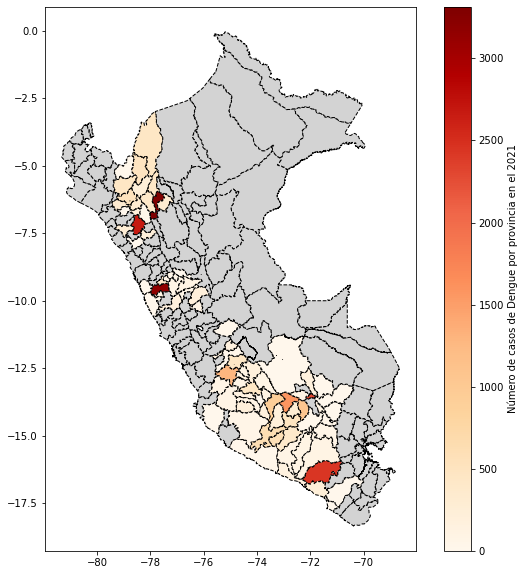

In [17]:
# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#prov_shp.plot( ax = ax )
# Use the 'Cases' column that exists in merged_gdf.
plot = merged_gdf.plot(column='Casos', 
                       ax=ax, 
                       legend=False,  # Do not create a legend automatically
                       cmap='OrRd',  # Colors for data ranges
                       linestyle='--',
                       edgecolor='black', # Black dashed lines 
                       missing_kwds={'color': 'lightgrey'})  # Color for missing data

# Now the colorbar can be created using the color collection from 'plot', 
#which is the first element in the 'ax' collections list
cbar = fig.colorbar(plot.collections[0], ax=ax)
cbar.set_label('Número de casos de Dengue por provincia en el 2021')
plt.show()

## 5. Use geopandas to plot the number of cases by the department for all the years using subplots. Every subplot for each year. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level.

In [18]:
# Filtramos los datos por la columna "Año" 
# para seleccionar los años 2015 al 2021
casos_dengue_15_21 = dengue_df[(dengue_df["Año"] >= 2015) & (dengue_df["Año"] <= 2021)]

In [19]:
# Eliminamos las comas de la columna "Casos" y luego convertimos a float
casos_dengue_15_21["Casos"] = casos_dengue_15_21["Casos"].str.replace(',', '').astype(float)

In [20]:
# Agrupamos y sumamos los casos por departamento y año para los años 2015 al 2021
casos_dengue_departamento_15_21 = casos_dengue_15_21.groupby(["Departamento", "Año"]).agg({"Casos": "sum"}).reset_index()

In [21]:
# Leemos el archivo shapefile y aplicamos la función
# Creamos un nuevo DataFrame llamado "departamento_shp"
departamento_shp = gpd.read_file(r'../../_data/INEI_LIMITE_DEPARTAMENTAL')
departamento_shp

,OBJECTID_1,OBJECTID,CCDD,NOMBDEP,CAPITAL,Shape_STAr,Shape_STLe,ORIG_FID,Shape_Leng,Shape_Area,CORREO,CONTACTO,WHATSAPP,geometry
0,1,1.0,01,AMAZONAS,CHACHAPOYAS,3.203006,12.912088,0,12.912088,3.203006,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995..."
1,2,2.0,02,ANCASH,HUARAZ,2.954592,11.780424,1,11.780424,2.954592,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.64697 -8.05086, -77.64689 -8.051..."
2,3,3.0,03,APURIMAC,ABANCAY,1.765933,7.730154,2,7.730154,1.765933,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-73.74655 -13.17442, -73.74570 -13.1..."
3,4,4.0,04,AREQUIPA,AREQUIPA,5.330203,17.405040,3,17.405040,5.330203,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-71.98109 -14.64062, -71.98093 -14.6..."
4,5,5.0,05,AYACUCHO,AYACUCHO,3.643705,17.127166,4,17.127166,3.643705,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-74.34843 -12.17503, -74.35000 -12.1..."
5,6,6.0,06,CAJAMARCA,CAJAMARCA,2.684527,12.397424,5,12.397424,2.684527,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-78.22182 -7.76346, -78.22233 -7.763..."
6,7,7.0,07,CALLAO,CALLAO,0.011738,1.111221,6,1.111221,0.011738,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.13504 -11.81820, -77.13484 -11.8..."
7,8,8.0,08,CUSCO,CUSCO,6.000331,21.794434,7,21.794434,6.000331,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-72.97280 -11.25189, -72.97134 -11.2..."
8,9,9.0,09,HUANCAVELICA,HUANCAVELICA,1.839851,9.561245,8,9.561245,1.839851,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-74.57118 -11.98710, -74.57095 -11.9..."
9,10,10.0,10,HUANUCO,HUANUCO,3.089811,14.589840,9,14.589840,3.089811,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-75.99200 -8.32108, -75.99015 -8.321..."


In [22]:
# Modificamos el nombre de la columna "NOMBDEP" a "Departamento"
departamento_shp = departamento_shp.rename(columns={'NOMBDEP': 'Departamento'})

In [23]:
# Unimos las bases de datos utilizando la columna "Departamento"
casos_dengue_departamento_15_21 = casos_dengue_departamento_15_21.merge(departamento_shp, how="right", on="Departamento")
casos_dengue_departamento_15_21

,Departamento,Año,Casos,OBJECTID_1,OBJECTID,CCDD,CAPITAL,Shape_STAr,Shape_STLe,ORIG_FID,Shape_Leng,Shape_Area,CORREO,CONTACTO,WHATSAPP,geometry
0,AMAZONAS,2015.0,37.0,1,1.0,01,CHACHAPOYAS,3.203006,12.912088,0,12.912088,3.203006,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995..."
1,AMAZONAS,2016.0,90.0,1,1.0,01,CHACHAPOYAS,3.203006,12.912088,0,12.912088,3.203006,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995..."
2,AMAZONAS,2017.0,93.0,1,1.0,01,CHACHAPOYAS,3.203006,12.912088,0,12.912088,3.203006,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995..."
3,AMAZONAS,2018.0,109.0,1,1.0,01,CHACHAPOYAS,3.203006,12.912088,0,12.912088,3.203006,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995..."
4,AMAZONAS,2019.0,164.0,1,1.0,01,CHACHAPOYAS,3.203006,12.912088,0,12.912088,3.203006,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,UCAYALI,2017.0,779.0,34,25.0,25,PUCALLPA,8.660111,27.470159,24,27.470159,8.660111,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-74.47145 -7.27617, -74.47052 -7.277..."
147,UCAYALI,2018.0,317.0,34,25.0,25,PUCALLPA,8.660111,27.470159,24,27.470159,8.660111,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-74.47145 -7.27617, -74.47052 -7.277..."
148,UCAYALI,2019.0,214.0,34,25.0,25,PUCALLPA,8.660111,27.470159,24,27.470159,8.660111,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-74.47145 -7.27617, -74.47052 -7.277..."
149,UCAYALI,2020.0,10934.0,34,25.0,25,PUCALLPA,8.660111,27.470159,24,27.470159,8.660111,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-74.47145 -7.27617, -74.47052 -7.277..."


In [24]:
# Seleccionamos las columnas Departamento, Casos, geometry del DataFrame casos_dengue_departamento_15_21
casos_dengue_departamento_15_21 = casos_dengue_departamento_15_21[['Departamento', 'Casos', 'geometry','Año']]

In [25]:
from geopandas import GeoDataFrame
# Aplicamos la función GeoDataFrame al DataFrame
casos_dengue_departamento_15_21_gdf = GeoDataFrame(casos_dengue_departamento_15_21)

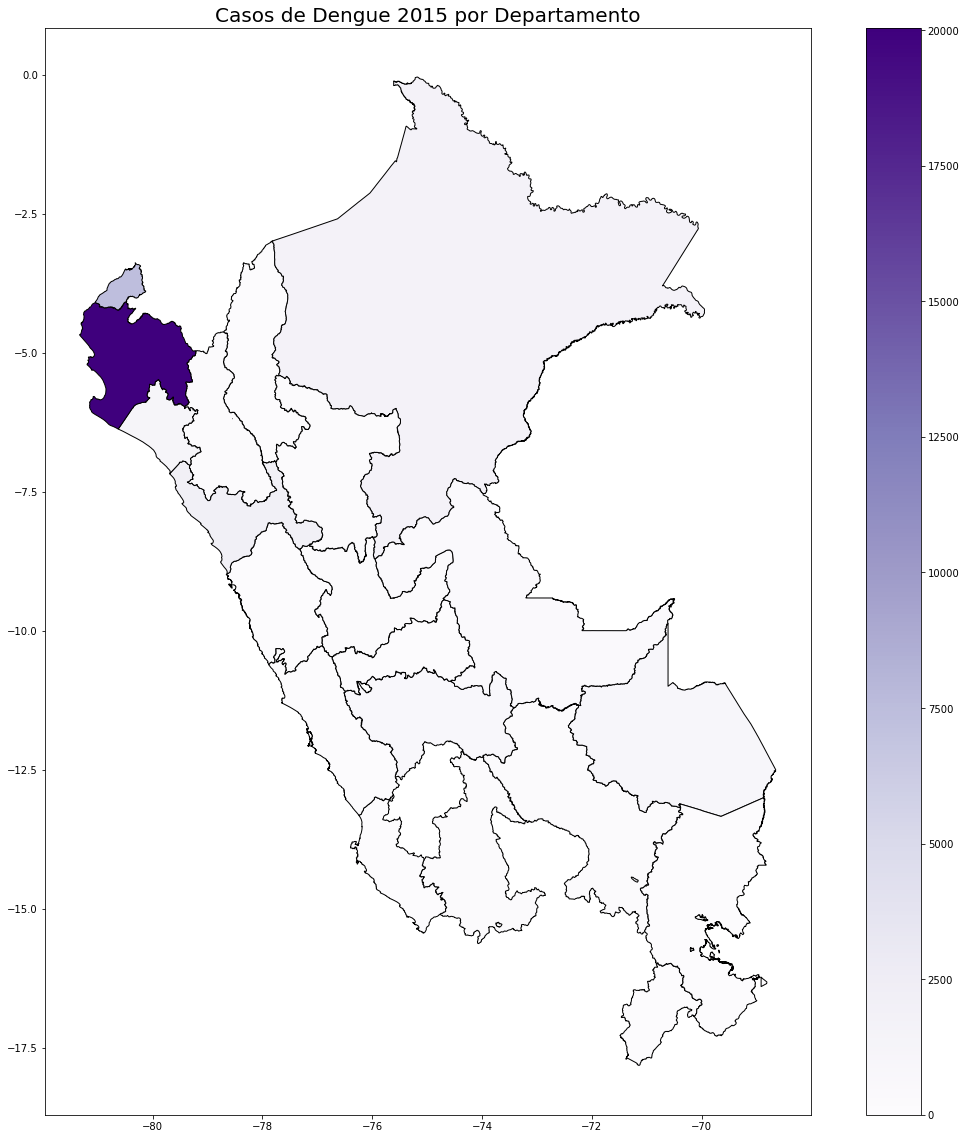

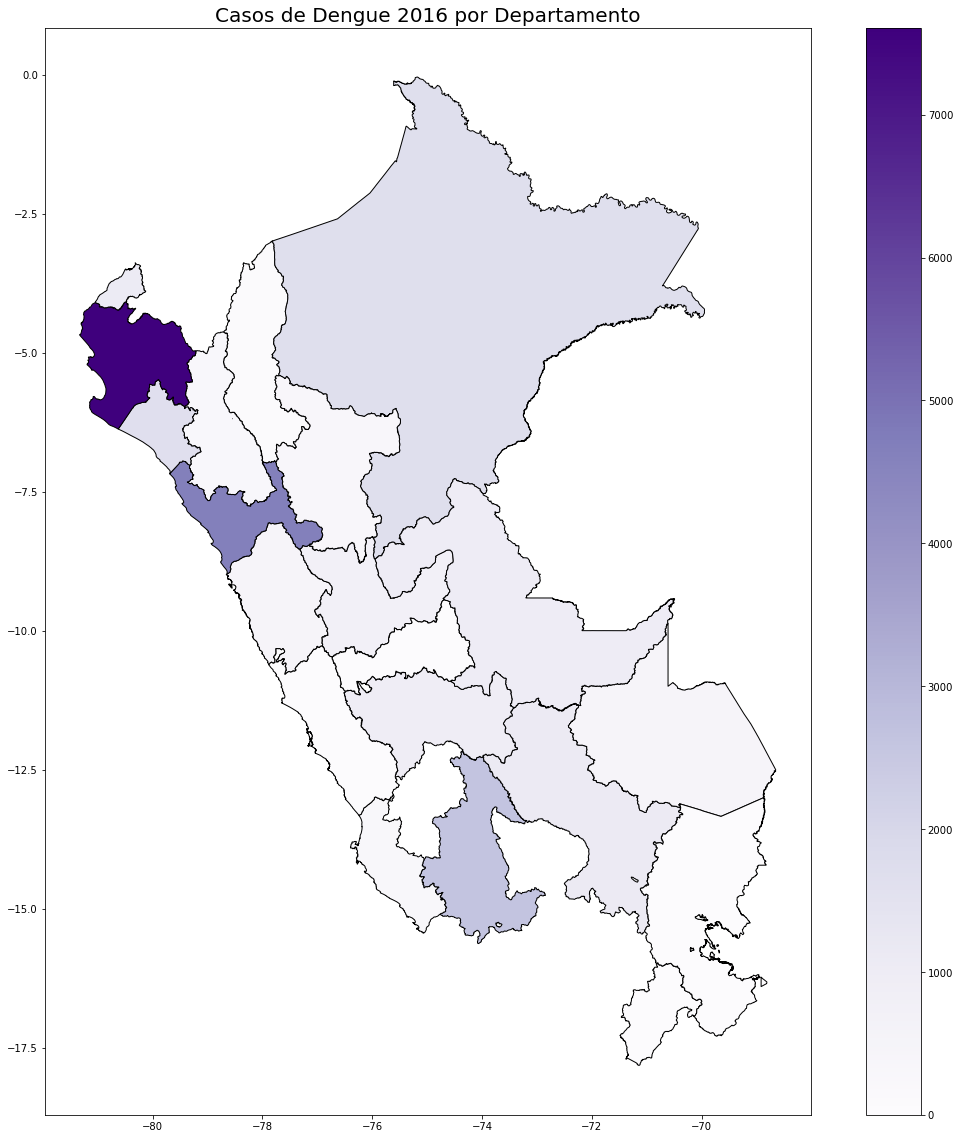

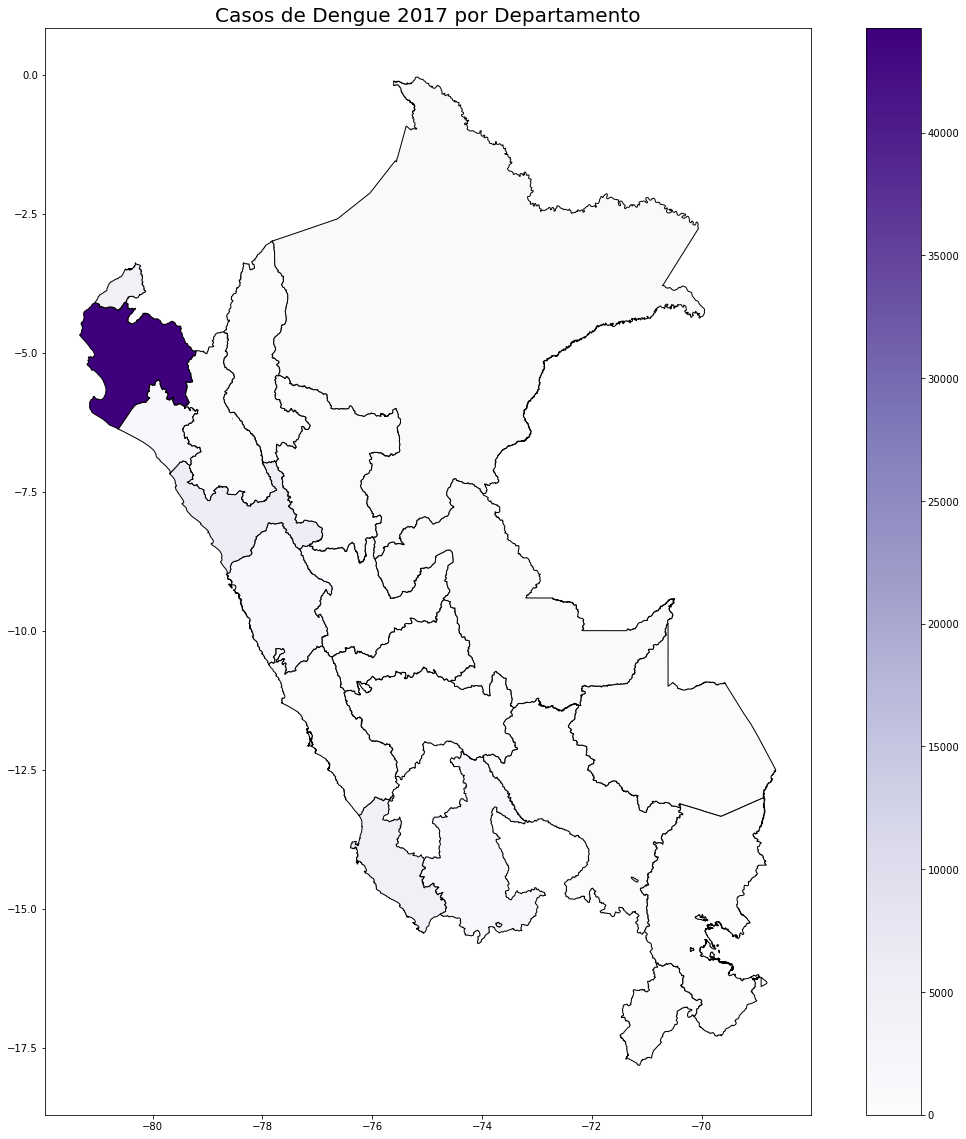

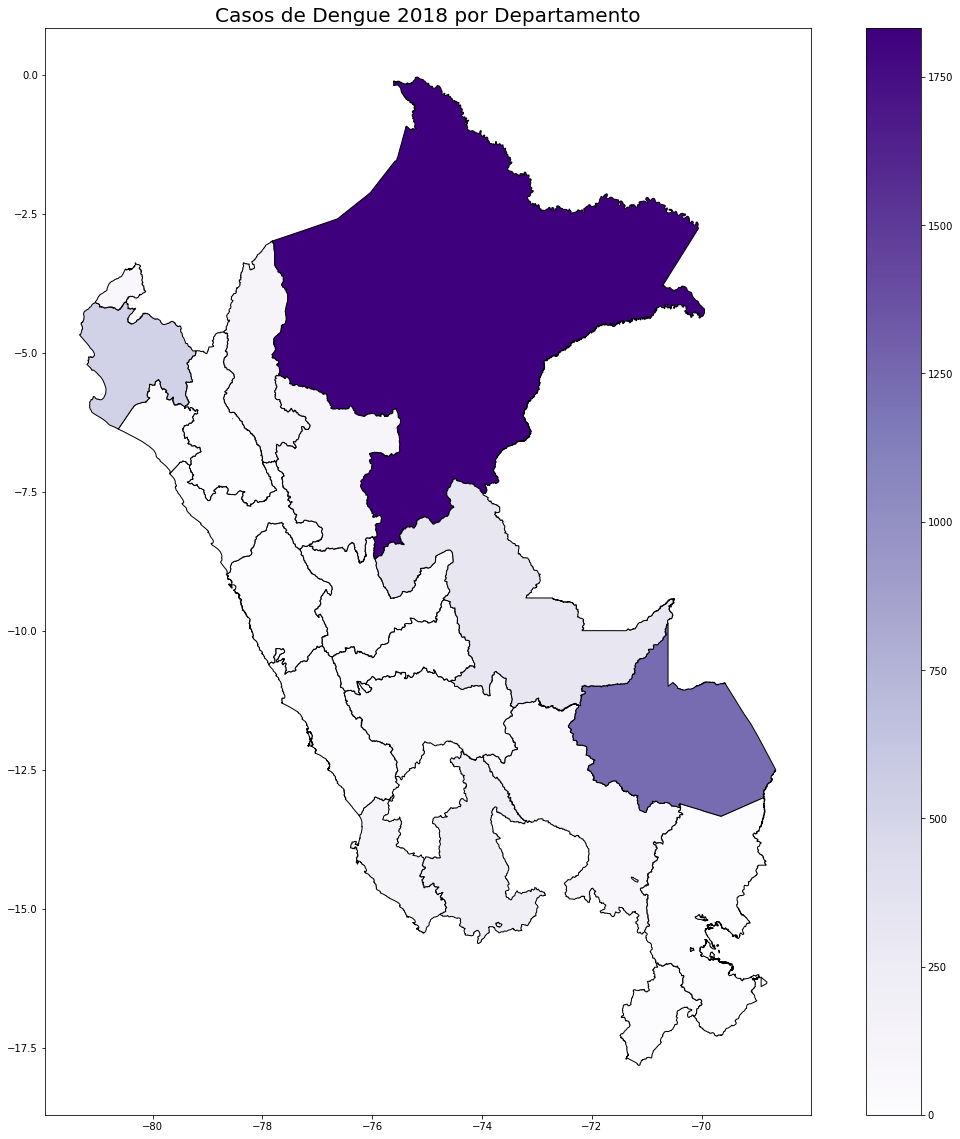

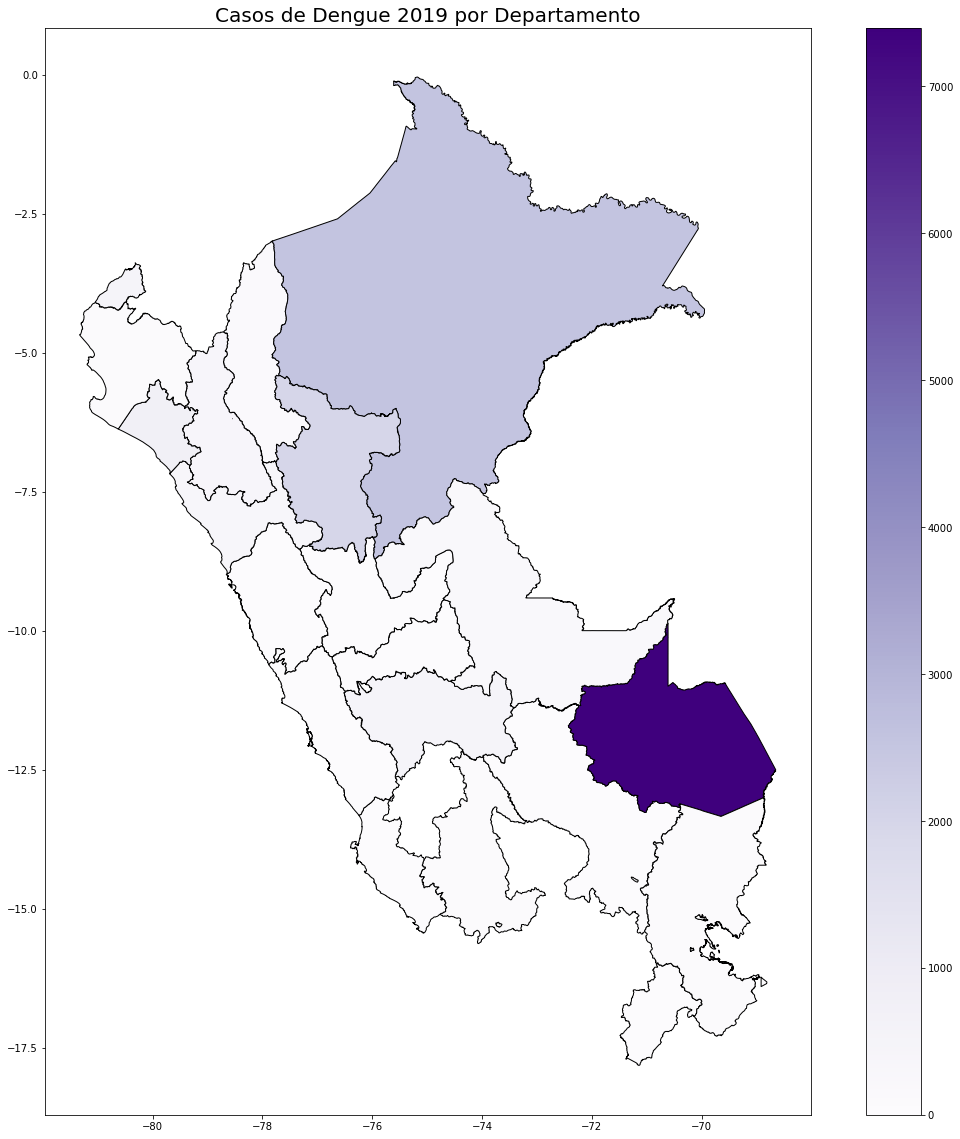

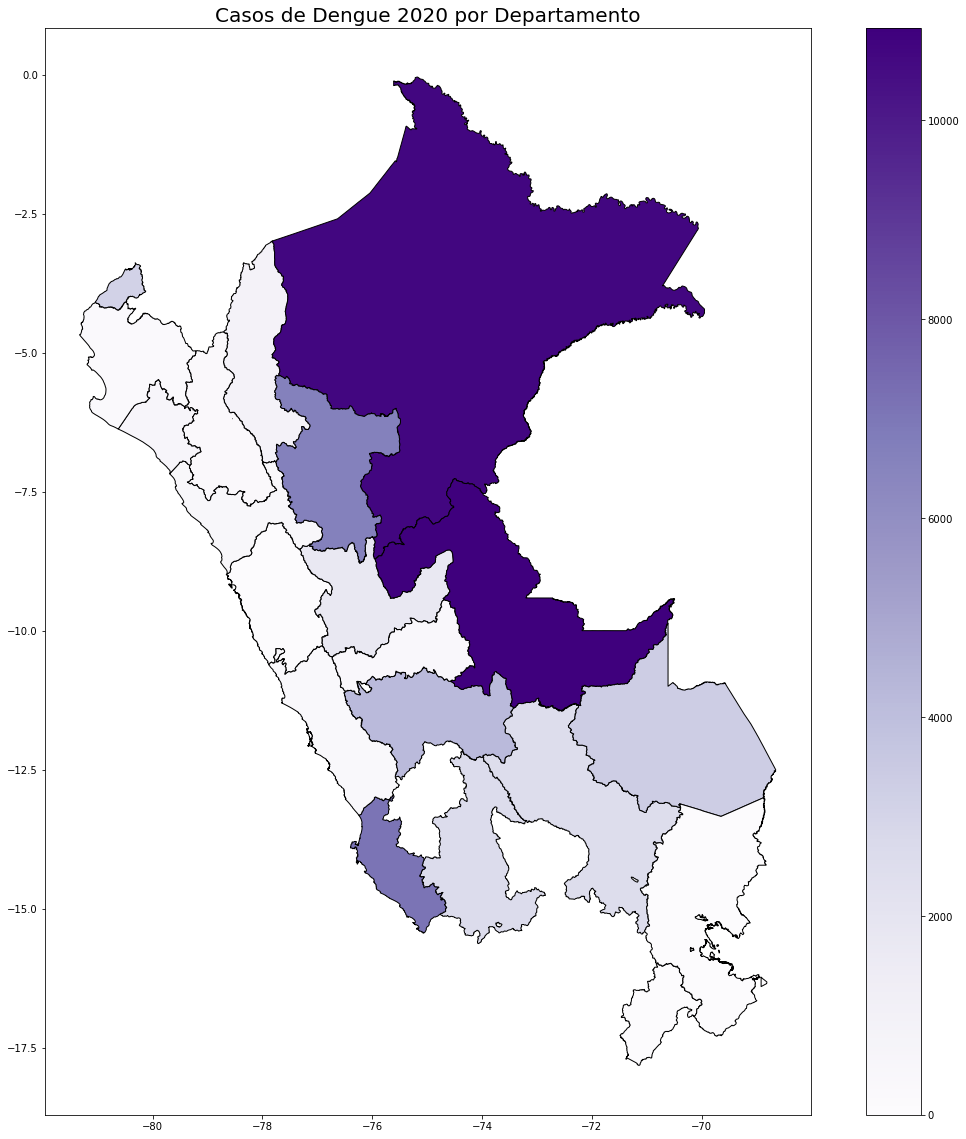

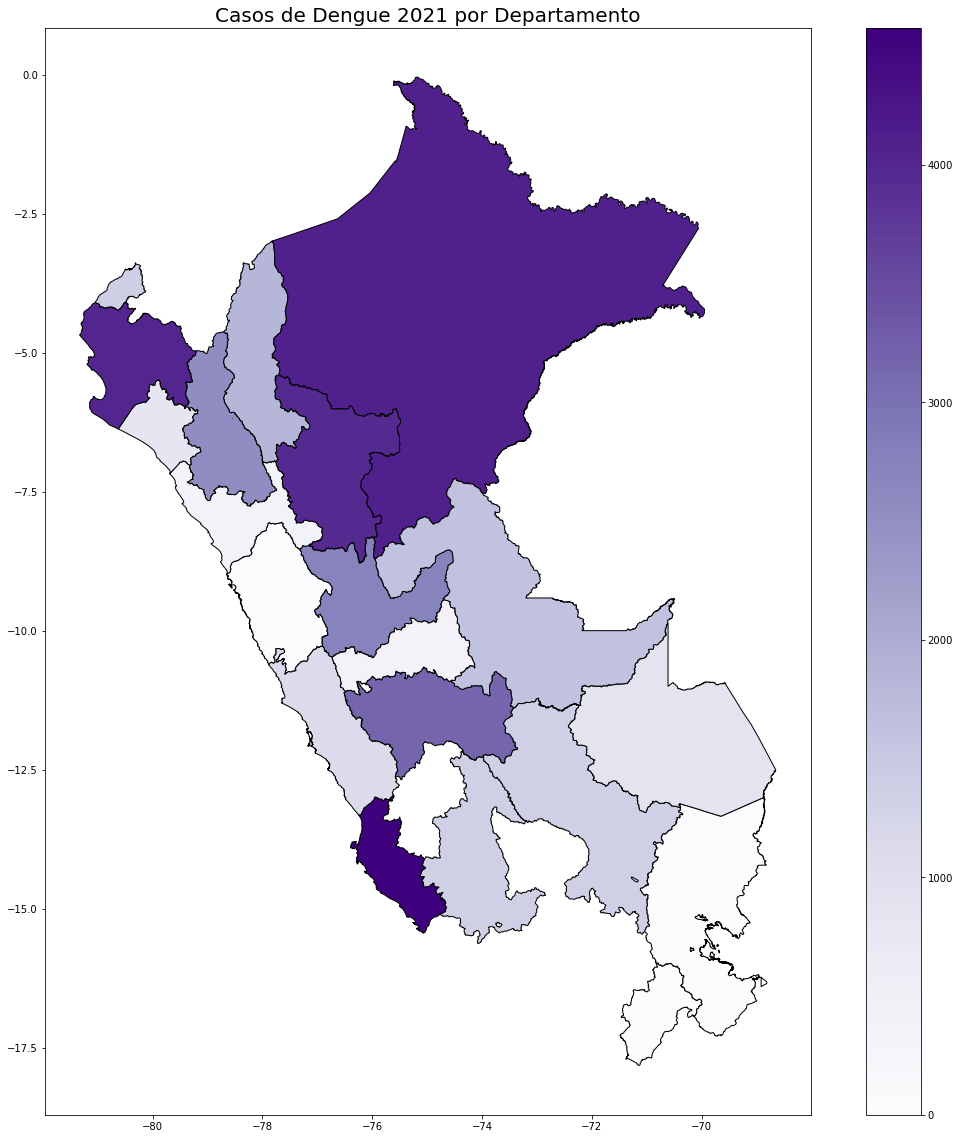

In [26]:
# Iteramos sobre los años de interés
for year in range(2015, 2022):
    # Filtramos los datos para el año actual
    casos_dengue_departamento_year = casos_dengue_departamento_15_21[casos_dengue_departamento_15_21["Año"] == year]
    
    # Creamos el GeoDataFrame para el año actual
    casos_dengue_departamento_year_gdf = GeoDataFrame(casos_dengue_departamento_year)
    
    # Hacemos el gráfico
    casos_dengue_departamento_year_gdf.plot(column='Casos', cmap='Purples',
                                            figsize=(20, 20),
                                            linestyle='-',
                                            edgecolor='black',
                                            legend=True,
                                            missing_kwds=dict(color="#E5E5E5"))
    
    # Título
    plt.title(f"Casos de Dengue {year} por Departamento", fontsize=20)
    
    # Mostramos el gráfico
    plt.show()

## 6. Use geopandas to plot the number of cases by the department for all 2021 quarters using subplots. Every subplot for each quarter. Use a categorical legend with 5 bins. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level. Hint: Use Semana variable to group by quarters.

In [27]:
# We already have dengue_2021, now we need to convert the weeks to quarters
dengue_2021['Quarter'] = np.select(
    [
        (dengue_2021['Semana'] >= 1) & (dengue_2021['Semana'] <= 13),
        (dengue_2021['Semana'] >= 14) & (dengue_2021['Semana'] <= 26),
        (dengue_2021['Semana'] >= 27) & (dengue_2021['Semana'] <= 39),
        (dengue_2021['Semana'] >= 40) & (dengue_2021['Semana'] <= 53)
    ],
    ['Q1', 'Q2', 'Q3', 'Q4'],
    default='Invalid'
)

dengue_2021

C:\Users\SALVADOR\AppData\Local\Temp\ipykernel_6572\4099438461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dengue_2021['Quarter'] = np.select(


,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,Ubigeo_Departamental,Ubigeo_Provincial,Quarter
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,0101,Q4
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,0101,Q4
6,2021,41,Dengue,LIMA,INDEPENDENCIA,LIMA,150112,NaN,15,0112,Q4
7,2021,41,Dengue,LIMA,VILLA MARIA DEL TRIUNFO,LIMA,150143,NaN,15,0143,Q4
8,2021,41,Dengue,LIMA,ATE,LIMA,150103,NaN,15,0103,Q4
...,...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,0203,Q4
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,0303,Q4
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,0203,Q4
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,0303,Q4


In [28]:
dengue_2021['Quarter'].unique()

array(['Q4', 'Q1', 'Q2', 'Q3'], dtype=object)

In [29]:
# Agrupamos y sumamos los casos por departamento y quarters
casos_dengue_departamento_quarters = dengue_2021.groupby(["Departamento", "Quarter"]).agg({"Casos": "sum"}).reset_index()
casos_dengue_departamento_quarters

,Departamento,Quarter,Casos
0,AMAZONAS,Q1,599.0
1,AMAZONAS,Q2,609.0
2,AMAZONAS,Q3,583.0
3,AMAZONAS,Q4,39.0
4,ANCASH,Q1,3.0
...,...,...,...
79,TUMBES,Q4,14.0
80,UCAYALI,Q1,923.0
81,UCAYALI,Q2,214.0
82,UCAYALI,Q3,424.0


In [30]:
# Leemos el archivo shapefile y creamos un nuevo DataFrame llamado "departamento_shp"
departamento_shp = gpd.read_file(r'../../_data/INEI_LIMITE_DEPARTAMENTAL')
departamento_shp

,OBJECTID_1,OBJECTID,CCDD,NOMBDEP,CAPITAL,Shape_STAr,Shape_STLe,ORIG_FID,Shape_Leng,Shape_Area,CORREO,CONTACTO,WHATSAPP,geometry
0,1,1.0,01,AMAZONAS,CHACHAPOYAS,3.203006,12.912088,0,12.912088,3.203006,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995..."
1,2,2.0,02,ANCASH,HUARAZ,2.954592,11.780424,1,11.780424,2.954592,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.64697 -8.05086, -77.64689 -8.051..."
2,3,3.0,03,APURIMAC,ABANCAY,1.765933,7.730154,2,7.730154,1.765933,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-73.74655 -13.17442, -73.74570 -13.1..."
3,4,4.0,04,AREQUIPA,AREQUIPA,5.330203,17.405040,3,17.405040,5.330203,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-71.98109 -14.64062, -71.98093 -14.6..."
4,5,5.0,05,AYACUCHO,AYACUCHO,3.643705,17.127166,4,17.127166,3.643705,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-74.34843 -12.17503, -74.35000 -12.1..."
5,6,6.0,06,CAJAMARCA,CAJAMARCA,2.684527,12.397424,5,12.397424,2.684527,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-78.22182 -7.76346, -78.22233 -7.763..."
6,7,7.0,07,CALLAO,CALLAO,0.011738,1.111221,6,1.111221,0.011738,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.13504 -11.81820, -77.13484 -11.8..."
7,8,8.0,08,CUSCO,CUSCO,6.000331,21.794434,7,21.794434,6.000331,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-72.97280 -11.25189, -72.97134 -11.2..."
8,9,9.0,09,HUANCAVELICA,HUANCAVELICA,1.839851,9.561245,8,9.561245,1.839851,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-74.57118 -11.98710, -74.57095 -11.9..."
9,10,10.0,10,HUANUCO,HUANUCO,3.089811,14.589840,9,14.589840,3.089811,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-75.99200 -8.32108, -75.99015 -8.321..."


In [31]:
# Modificamos el nombre de la columna "NOMBDEP" a "Departamento"
departamento_shp = departamento_shp.rename(columns={'NOMBDEP': 'Departamento'})

# Unimos las bases de datos utilizando la columna "Departamento"
casos_dengue_departamento_quarters = casos_dengue_departamento_quarters.merge(departamento_shp, how="right", on="Departamento")
casos_dengue_departamento_quarters

,Departamento,Quarter,Casos,OBJECTID_1,OBJECTID,CCDD,CAPITAL,Shape_STAr,Shape_STLe,ORIG_FID,Shape_Leng,Shape_Area,CORREO,CONTACTO,WHATSAPP,geometry
0,AMAZONAS,Q1,599.0,1,1.0,01,CHACHAPOYAS,3.203006,12.912088,0,12.912088,3.203006,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995..."
1,AMAZONAS,Q2,609.0,1,1.0,01,CHACHAPOYAS,3.203006,12.912088,0,12.912088,3.203006,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995..."
2,AMAZONAS,Q3,583.0,1,1.0,01,CHACHAPOYAS,3.203006,12.912088,0,12.912088,3.203006,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995..."
3,AMAZONAS,Q4,39.0,1,1.0,01,CHACHAPOYAS,3.203006,12.912088,0,12.912088,3.203006,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995..."
4,ANCASH,Q1,3.0,2,2.0,02,HUARAZ,2.954592,11.780424,1,11.780424,2.954592,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.64697 -8.05086, -77.64689 -8.051..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,TUMBES,Q4,14.0,33,24.0,24,TUMBES,0.378757,3.787977,23,3.787977,0.378757,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-80.28521 -3.41276, -80.28406 -3.412..."
84,UCAYALI,Q1,923.0,34,25.0,25,PUCALLPA,8.660111,27.470159,24,27.470159,8.660111,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-74.47145 -7.27617, -74.47052 -7.277..."
85,UCAYALI,Q2,214.0,34,25.0,25,PUCALLPA,8.660111,27.470159,24,27.470159,8.660111,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-74.47145 -7.27617, -74.47052 -7.277..."
86,UCAYALI,Q3,424.0,34,25.0,25,PUCALLPA,8.660111,27.470159,24,27.470159,8.660111,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-74.47145 -7.27617, -74.47052 -7.277..."


In [32]:
casos_dengue_departamento_quarters['Departamento']

0     AMAZONAS
1     AMAZONAS
2     AMAZONAS
3     AMAZONAS
4       ANCASH
        ...   
83      TUMBES
84     UCAYALI
85     UCAYALI
86     UCAYALI
87     UCAYALI
Name: Departamento, Length: 88, dtype: object

In [34]:
# Seleccionamos las columnas Departamento, Casos, geometry del DataFrame casos_dengue_departamento_15_21
casos_dengue_departamento_quarters = casos_dengue_departamento_quarters[['Departamento', 'Casos', 'geometry','Quarter']]
casos_dengue_departamento_quarters


,Departamento,Casos,geometry,Quarter
0,AMAZONAS,599.0,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...",Q1
1,AMAZONAS,609.0,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...",Q2
2,AMAZONAS,583.0,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...",Q3
3,AMAZONAS,39.0,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...",Q4
4,ANCASH,3.0,"POLYGON ((-77.64697 -8.05086, -77.64689 -8.051...",Q1
...,...,...,...,...
83,TUMBES,14.0,"POLYGON ((-80.28521 -3.41276, -80.28406 -3.412...",Q4
84,UCAYALI,923.0,"POLYGON ((-74.47145 -7.27617, -74.47052 -7.277...",Q1
85,UCAYALI,214.0,"POLYGON ((-74.47145 -7.27617, -74.47052 -7.277...",Q2
86,UCAYALI,424.0,"POLYGON ((-74.47145 -7.27617, -74.47052 -7.277...",Q3


In [ ]:
from geopandas import GeoDataFrame

# Aplicamos la función GeoDataFrame al DataFrame
casos_dengue_departamento_15_21_gdf = GeoDataFrame(casos_dengue_departamento_15_21)


TypeError: __init__() got an unexpected keyword argument 'loc'

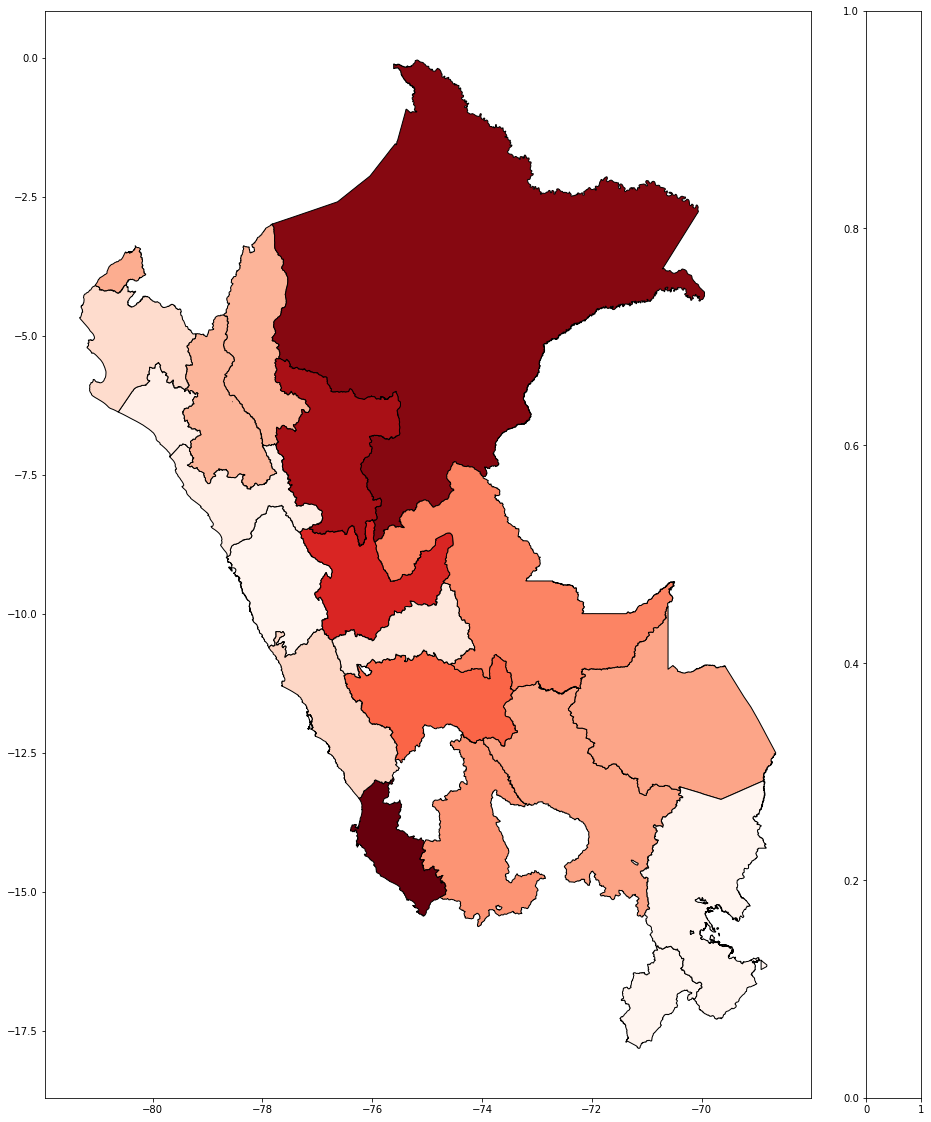

In [60]:
# !pip install mapclassify

# Iteramos sobre los años de interés
for q in ['Q1', 'Q2', 'Q3', 'Q4']:
    # Filtramos los datos para el quarter actual
    casos_dengue_departamento_q = casos_dengue_departamento_quarters[casos_dengue_departamento_quarters["Quarter"] == q]
    
    # Creamos el GeoDataFrame para el quarter actual
    casos_dengue_departamento_q_gdf = GeoDataFrame(casos_dengue_departamento_q)
    
    # Hacemos el gráfico
    casos_dengue_departamento_q_gdf.plot(column='Casos', cmap='Reds',
                                         figsize=(20, 20),
                                         linestyle='-',
                                         edgecolor='black',
                                         legend=True,
                                         missing_kwds=dict(color="#E5E5E5"),
                                         classification_kwds=dict(bins=[20, 30, 40, 50, 100]),
                                         legend_kwds=dict(loc='upper left',
                                                          bbox_to_anchor=(1.01, 1),
                                                          fontsize='x-large',
                                                          title="Casos de Dengue",
                                                          title_fontsize='x-large',
                                                          frameon=False))
    
    # Título
    plt.title(f"Casos de Dengue por Departamento en el {q}", fontsize=20)
    
    # Mostramos el gráfico
    plt.show()
   
    

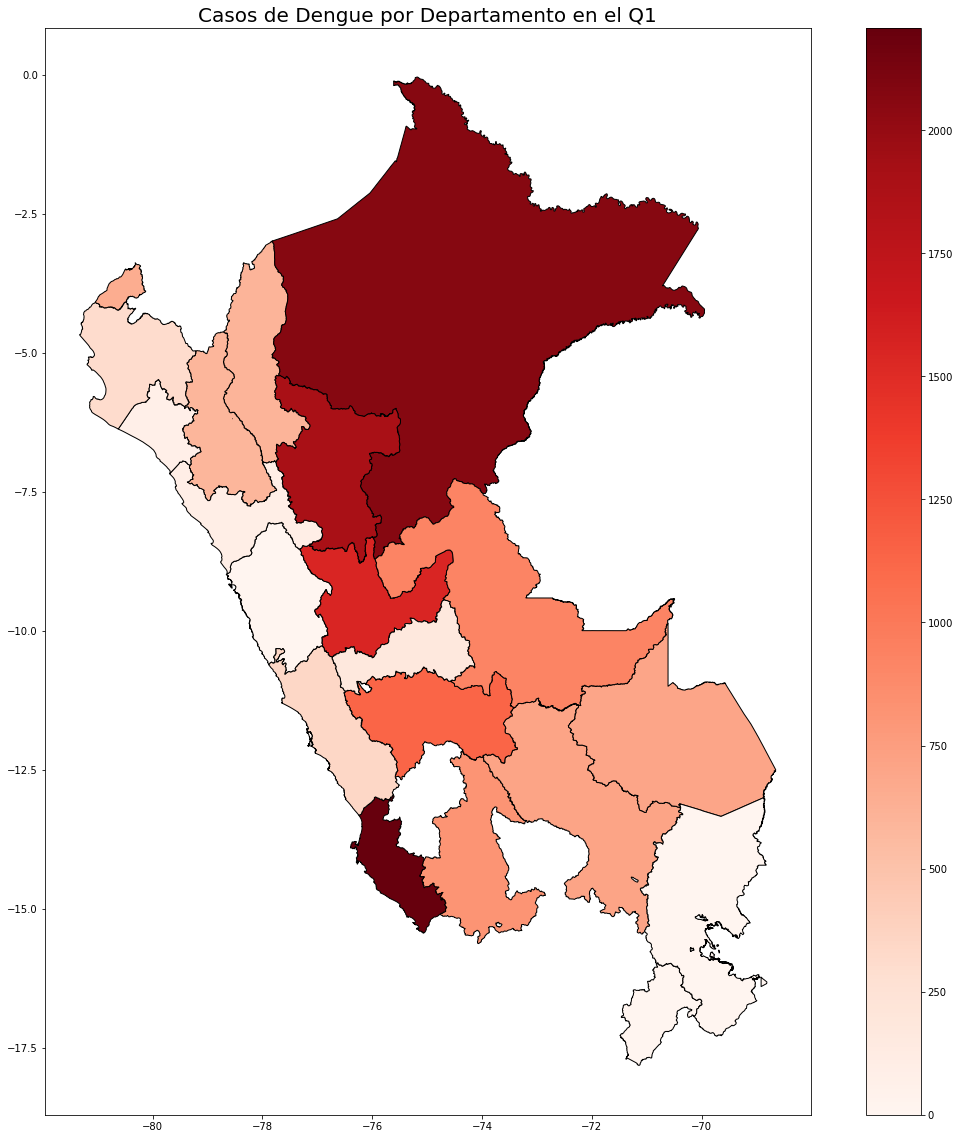

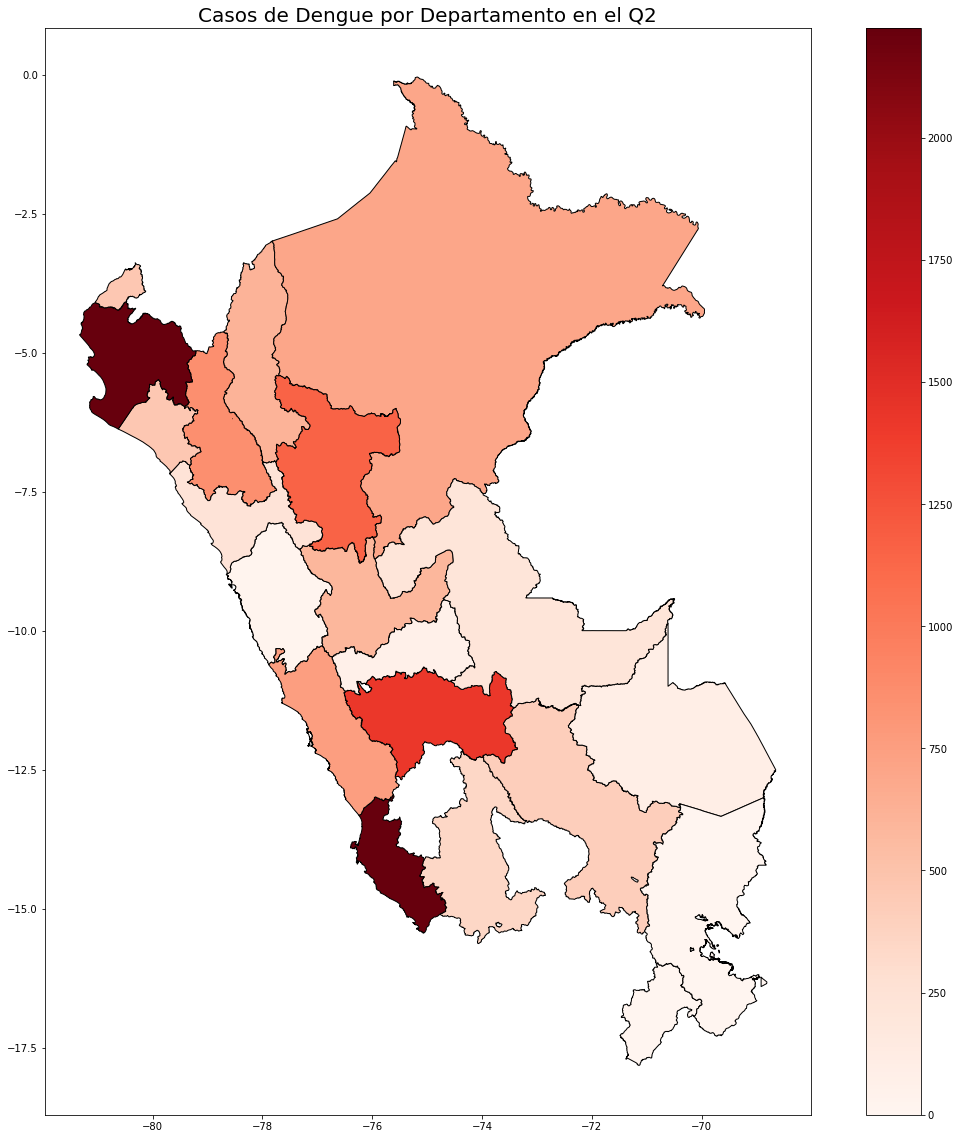

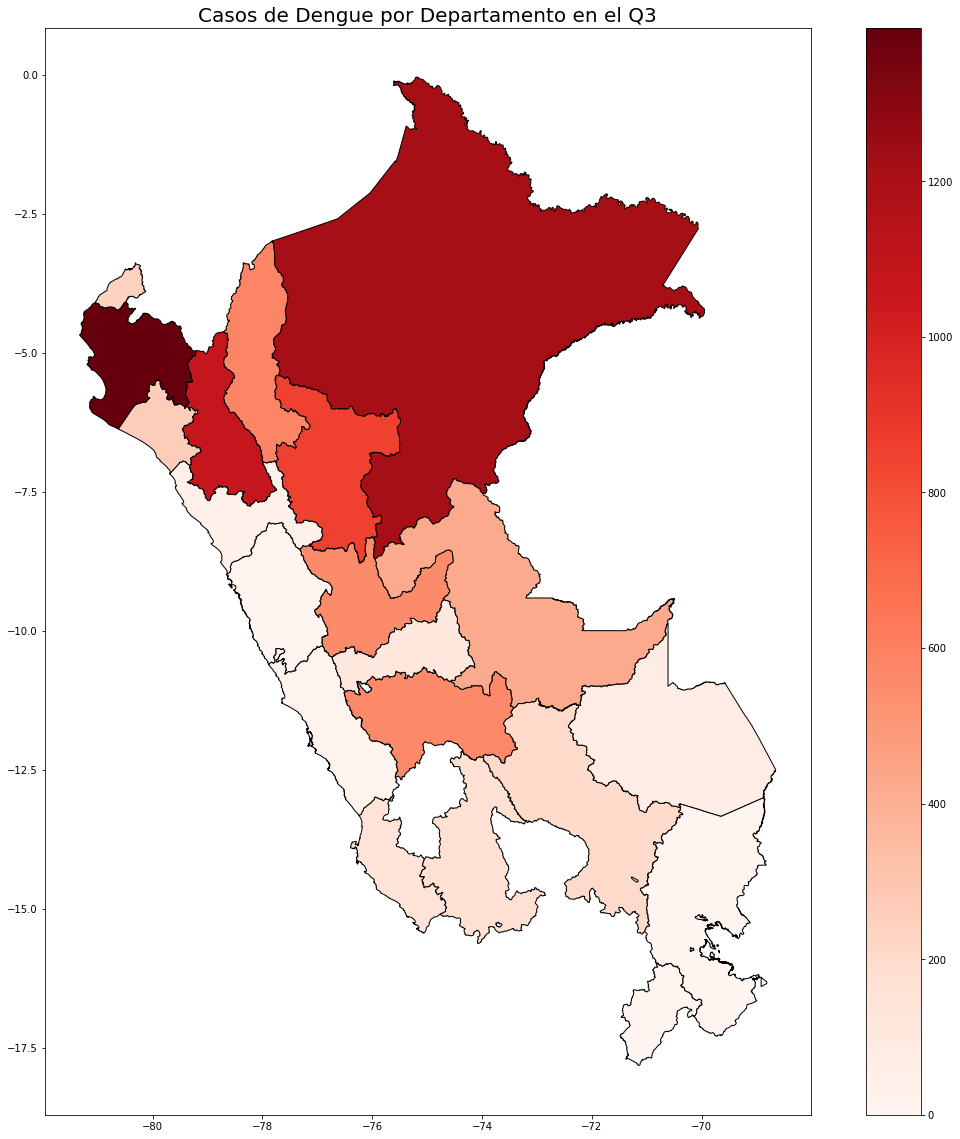

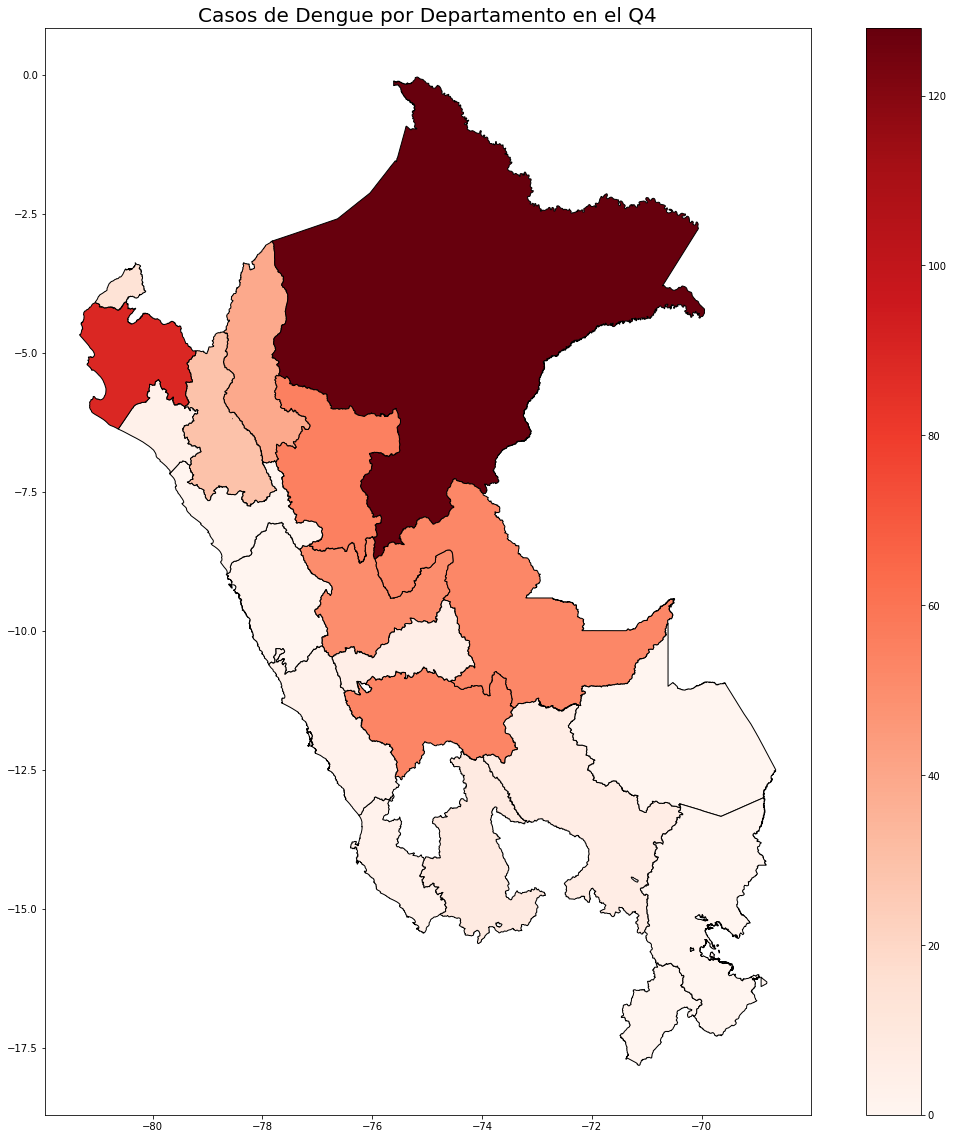

In [80]:
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

# Iteramos sobre los quarters de interés
for q in ['Q1', 'Q2', 'Q3', 'Q4']:
    # Filtramos los datos para el quarter actual
    casos_dengue_departamento_q = casos_dengue_departamento_quarters[casos_dengue_departamento_quarters["Quarter"] == q]
    
    # Creamos el GeoDataFrame para el quarter actual
    casos_dengue_departamento_q_gdf = GeoDataFrame(casos_dengue_departamento_q)
    
    # Hacemos el gráfico
    ax = casos_dengue_departamento_q_gdf.plot(column='Casos', cmap='Reds',
                                              figsize=(20, 20),
                                              linestyle='-',
                                              edgecolor='black',
                                              legend=True,
                                              missing_kwds=dict(color="#E5E5E5"),
                                              classification_kwds=dict(bins=[20, 30, 40, 50, 100]))
    # Título
    plt.title(f"Casos de Dengue por Departamento en el {q}", fontsize=20)
    
    # Mostramos el gráfico
    plt.show()


    
    